In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline#for encoding
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

UsageError: unrecognized arguments: encoding


In [7]:
#reading the data
df = pd.read_csv('zoo_data.csv')
print(df.head())

   1  0  0.1  1.1  0.2  0.3  1.2  1.3  1.4  1.5  0.4  0.5  4  0.6  0.7  1.6  \
0  1  0    0    1    0    0    0    1    1    1    0    0  4    1    0    1   
1  0  0    1    0    0    1    1    1    1    0    0    1  0    1    0    0   
2  1  0    0    1    0    0    1    1    1    1    0    0  4    0    0    1   
3  1  0    0    1    0    0    1    1    1    1    0    0  4    1    0    1   
4  1  0    0    1    0    0    0    1    1    1    0    0  4    1    0    1   

   1.7  
0    1  
1    4  
2    1  
3    1  
4    1  


In [8]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       100 non-null    int64
 1   0       100 non-null    int64
 2   0.1     100 non-null    int64
 3   1.1     100 non-null    int64
 4   0.2     100 non-null    int64
 5   0.3     100 non-null    int64
 6   1.2     100 non-null    int64
 7   1.3     100 non-null    int64
 8   1.4     100 non-null    int64
 9   1.5     100 non-null    int64
 10  0.4     100 non-null    int64
 11  0.5     100 non-null    int64
 12  4       100 non-null    int64
 13  0.6     100 non-null    int64
 14  0.7     100 non-null    int64
 15  1.6     100 non-null    int64
 16  1.7     100 non-null    int64
dtypes: int64(17)
memory usage: 13.4 KB


In [9]:
df.shape

(100, 17)

In [10]:
df.isnull().any()

1      False
0      False
0.1    False
1.1    False
0.2    False
0.3    False
1.2    False
1.3    False
1.4    False
1.5    False
0.4    False
0.5    False
4      False
0.6    False
0.7    False
1.6    False
1.7    False
dtype: bool

<AxesSubplot:>

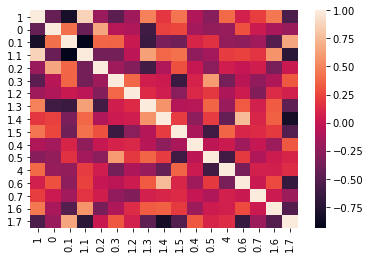

In [12]:
# correlation matrix
sns.heatmap(df.corr())

In [15]:
x=df.values[:,0:15]
y=df.values[:,16]
print(x)
print(y)

[[1 0 0 ... 4 1 0]
 [0 0 1 ... 0 1 0]
 [1 0 0 ... 4 0 0]
 ...
 [1 0 0 ... 4 1 0]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 2 1 0]]
[1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 5 1 1 1 6 1 1 2 4 1 1 2
 4 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4 1
 1 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]


In [17]:
target=y

In [20]:
from sklearn.model_selection import train_test_split#for decision tree object


In [41]:
# Splitting the data - 80:20 ratio
print("for entropy")
X_train, X_test, Y_train, Y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

print("for gini index")
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

for entropy
Training split input-  (80, 15)
Testing split input-  (20, 15)
for gini index
Training split input-  (80, 15)
Testing split input-  (20, 15)


In [46]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtree_gin = DecisionTreeClassifier( max_depth=3)
print('Decision Tree Classifier Created for entropy')
dtree.fit(X_train,Y_train)
print('Decision Tree Classifier Created for gini index')
dtree_gin.fit(X_train,y_train)
dtree.predict(X_test)
dtree_gin.predict(x_test)


Decision Tree Classifier Created for entropy
Decision Tree Classifier Created for gini index


array([1, 1, 2, 6, 1, 6, 2, 6, 2, 1, 1, 1, 1, 4, 6, 1, 6, 2, 6, 1])

In [44]:
# Predicting the values of test data
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
print("for entropy")
Y_pred = dtree.predict(X_test)
print(Y_pred)
print("Classification report - \n", classification_report(Y_test,Y_pred))
print("for GINI INDEX")
y_pred = dtree_gin.predict(x_test)
print(y_pred)
print("Classification report - \n", classification_report(y_test,y_pred))

for entropy
[1 1 2 6 1 6 2 6 2 1 1 1 1 4 4 1 6 2 6 1]
Classification report - 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.50      1.00      0.67         1
           6       0.20      1.00      0.33         1
           7       0.00      0.00      0.00         4

    accuracy                           0.75        20
   macro avg       0.45      0.67      0.50        20
weighted avg       0.68      0.75      0.70        20

for GINI INDEX
[1 1 2 6 1 6 2 6 2 1 1 1 1 4 6 1 6 2 6 1]
Classification report - 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           6       0.17

/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm = confusion_matrix(y_test, y_pred)


In [35]:
print(cm)

[[9 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 4 0]]


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       100 non-null    int64
 1   0       100 non-null    int64
 2   0.1     100 non-null    int64
 3   1.1     100 non-null    int64
 4   0.2     100 non-null    int64
 5   0.3     100 non-null    int64
 6   1.2     100 non-null    int64
 7   1.3     100 non-null    int64
 8   1.4     100 non-null    int64
 9   1.5     100 non-null    int64
 10  0.4     100 non-null    int64
 11  0.5     100 non-null    int64
 12  4       100 non-null    int64
 13  0.6     100 non-null    int64
 14  0.7     100 non-null    int64
 15  1.6     100 non-null    int64
 16  1.7     100 non-null    int64
dtypes: int64(17)
memory usage: 13.4 KB


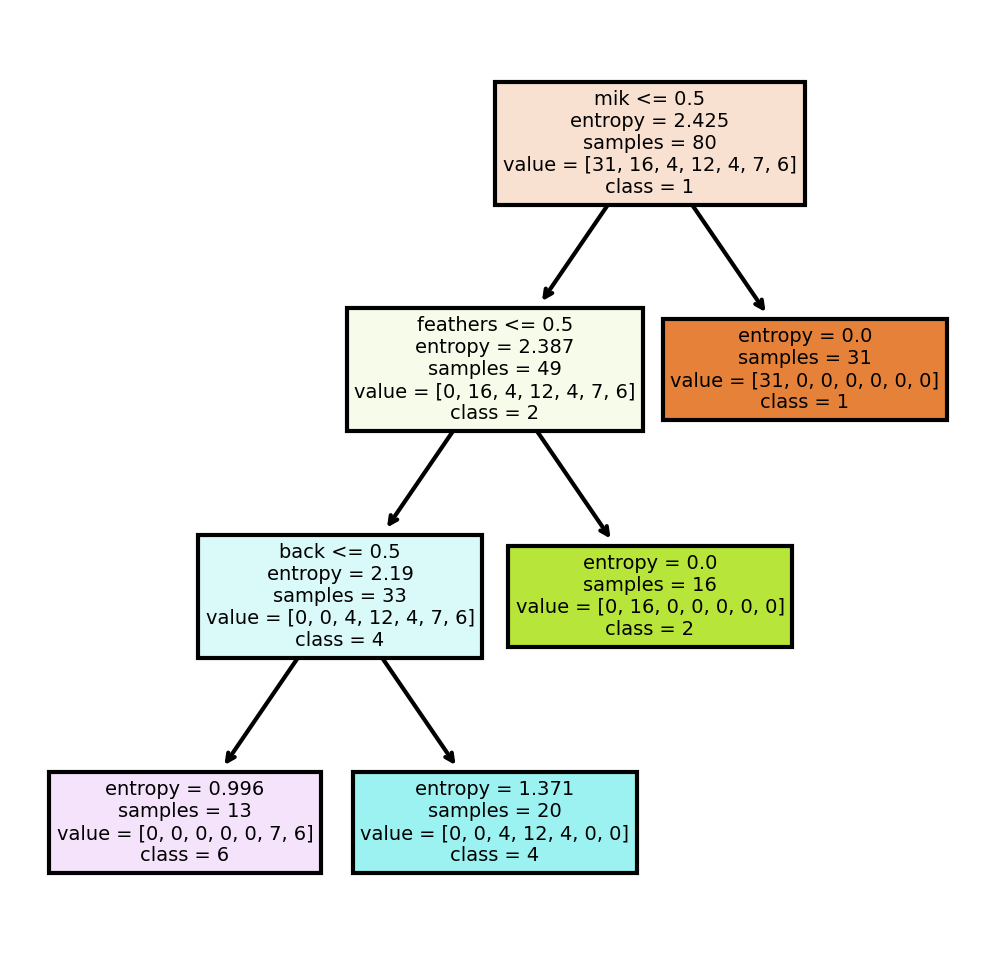

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree
fn=['hair','feathers','eggs','mik','air','aqua','pred','toot','back','bre','ven','fin','leg','tail','dom','cat','typ']
cn=['1','2','3','4','5','6','7']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')